# **Import libaries**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#for import the data
import pandas as pd
import numpy as np

# for the visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for the text pre-processing (text cleaning)
import nltk
nltk.download('punkt')
import re #regular expression
import string
from nltk.tokenize import word_tokenize # word tokenization
from nltk.stem import PorterStemmer # word stemming

#for feature extraction ( vectorazation)
from sklearn.feature_extraction.text import CountVectorizer

#for split the data into train and test
from sklearn.model_selection import train_test_split

#for the model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#for the model evaluation
from sklearn.metrics import multilabel_confusion_matrix,classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#**Import Data**

In [4]:
data = pd.read_csv('../processed_data/enriched.csv')

In [5]:
data.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# **EDA**

In [6]:
data.shape

(6544, 8)

In [7]:
data.isna().sum()

Unnamed: 0           0
post                 0
prefLabel            0
Document_Keywords    0
compulsion           0
obs-com              0
obsession            0
enriched_post        0
dtype: int64

In [10]:
# defne new column named 'email_length' that contain the length of each email in the dataset
data["post_length"]=data["enriched_post"].apply(len)

In [11]:
print('the max length post is:',data['post_length'].max())
print('the min length post is:',data['post_length'].min())
print('the avg length post is:',data['post_length'].mean())

the max length post is: 5686270
the min length post is: 27
the avg length post is: 8715.565709046456


<Axes: ylabel='Frequency'>

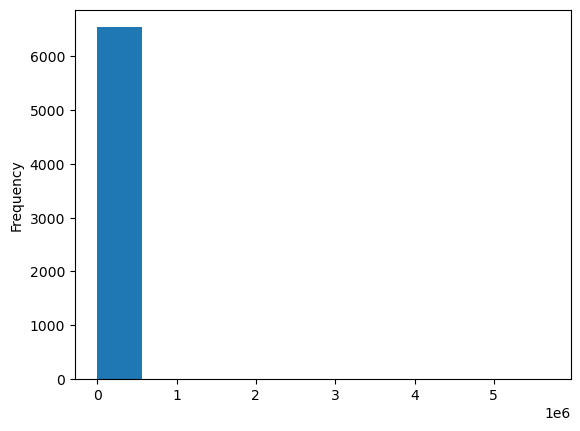

In [12]:
#display the distribution of email's length
data['post_length'].plot.hist()

In [13]:
# delete all emails that its length not in [2500:10]
data = data[data.post_length<2500]
data = data[data.post_length>10]

<Axes: ylabel='Frequency'>

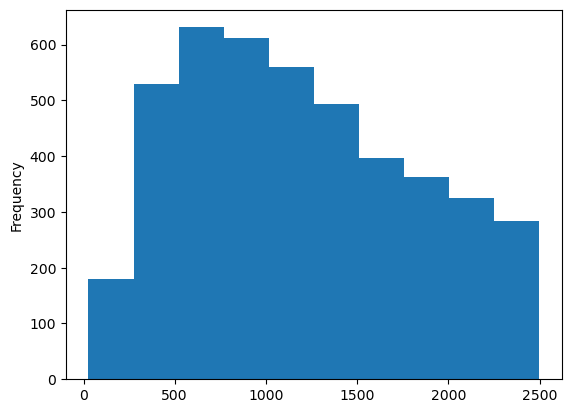

In [14]:

data['post_length'].plot.hist()

In [15]:
#shape of new data
data.shape

(4374, 9)

# **Text Pre-Processing**

### **Text Cleaning**

In [16]:
#Clean Text
def clean_text(data):
  # convert catacter to lowercase
  data['clean_text']=data['enriched_post'].str.lower()
  #remove URLS
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
  #remove ponctuation
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
  #remove
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
  #remove degits
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
  #remove multiple spaces
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
  #remove single caracter
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
  return data

In [17]:
data = clean_text(data)

### **Remove StopWords**
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

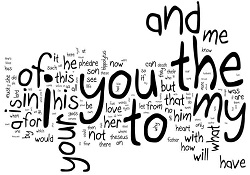

In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def remove_stop_words(text):
  stopW=stopwords.words('english')
  s=""
  for i in text.split():
    if i not in stopW:
        s=s+i+" "
  return s

In [20]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_stop_words(x))

### **Stemming and Lemmatization**
This can be done using Stemming or Lemmatization.

*   **Stemming**: It uses a rule-based system to bring a word to its
canonical form. Like removing ‘ing’ from ‘dancing’ to form ‘danc’ or ‘ticked’ to ‘tick’. As you can see, stemming might not produce a dictionary word all the time after normalization.

*  **Lemmatizer**: It is a more intelligent system that keeps a dictionary on its side while normalizing words. Hence it will normalize ‘dancing’ to ‘dance’ & not ‘danc’ as done in stemming.

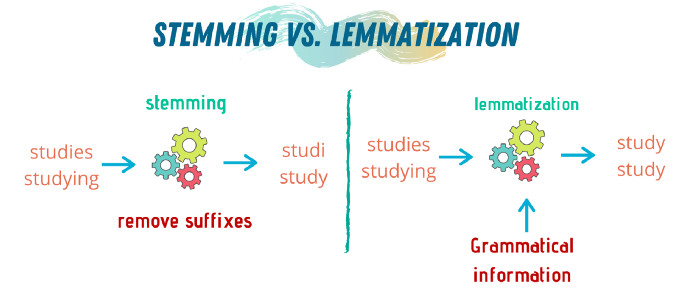

In [21]:
def stem(ch):
  stem = PorterStemmer()
  return " ".join([stem.stem(i) for i in ch.split()])

#apply the stem function to each row in the dataframe
data['clean_text'] = data['clean_text'].apply(lambda x:stem(x))

In [26]:
print('text before cleaning :',data['enriched_post'].iloc[0])
print('-'*150)
print('text after cleaning :',data['clean_text'].iloc[0])

text before cleaning : Hi, 
First, I {Hoffnung} hope {espoir} {hope} everyone managed to have some joy {joy} and {happiness} {joy {joy}} {Gelassenheit} {serenity} {sérénité} {Spaß} {amusement} {divertissement} {Hochgefühl} happiness {elation} {elation} {Euphorie} {euphoria} {l'euphorie} {contentment} {Genuss} {enjoyment} {jouissance} this Christmas, especially those who are struggling a lot at the moment. 
Second, this post is going to be weird so I apologise.
Today I realised something very important. I realised that I actually am a bad person. When I look around I see normal and kind people; when I look at myself I see something disguting and weird (but not in a good way). This sounds silly but I received lots of presents today (I've never received so many before) and I felt so guilty. I don't deserve good things or people in my life. 
Besides the fears of being attracted to children and being an abuser, I realised that I have so many other small obsessions. And they are absolutely d

# **Feature Extraction ( Word Vector Using Bag Of Word *BOW*)**

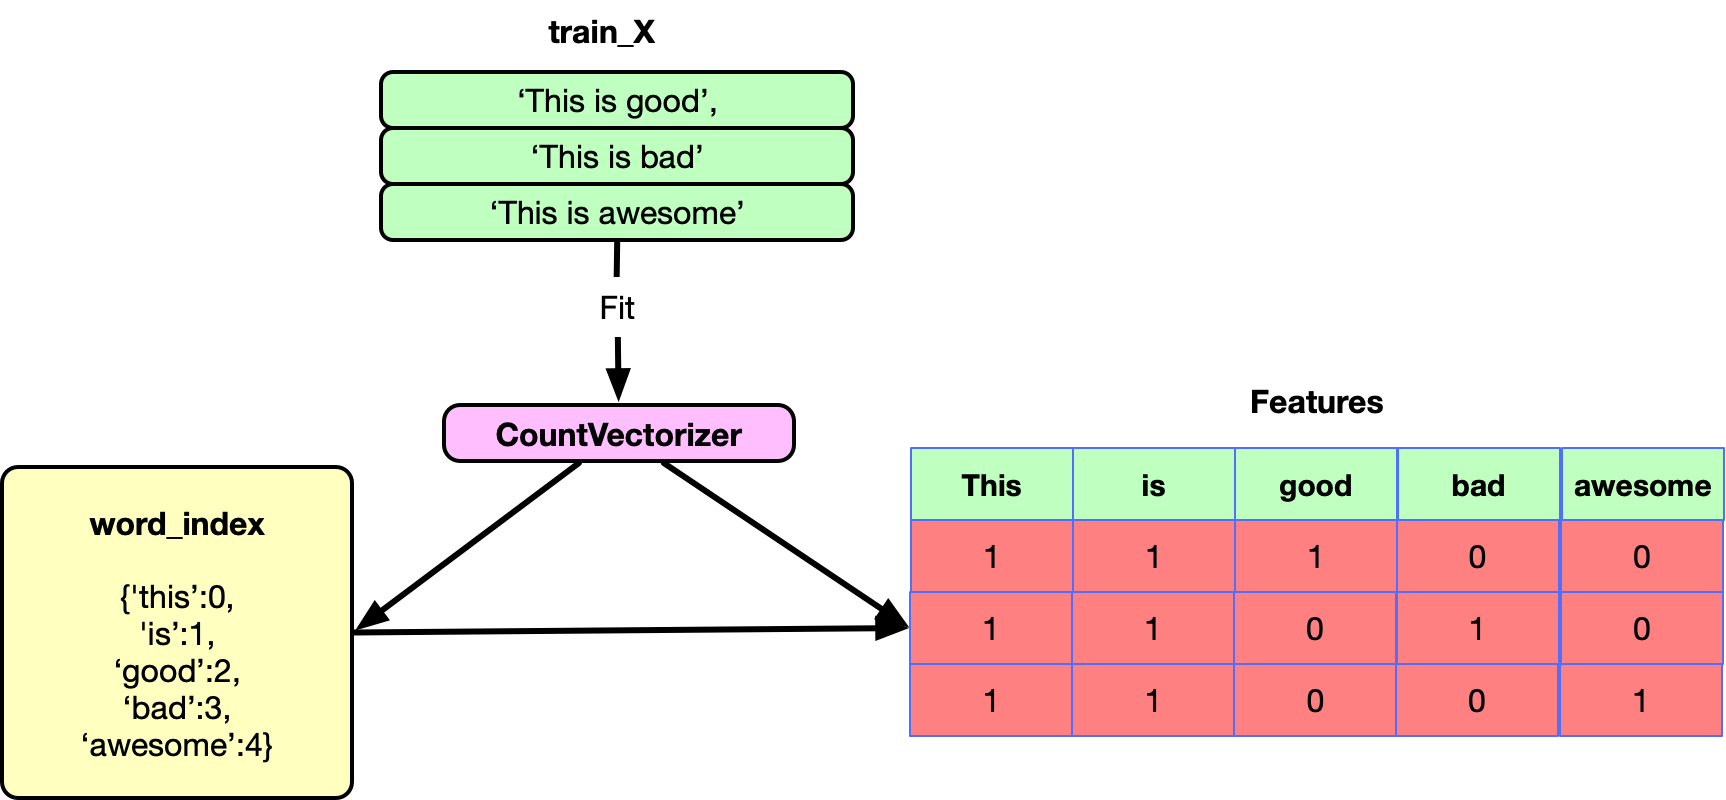

In [27]:
"""
 CountVectorizer creates a dictionary containing the occurrence number of tokens
"""
#convert text to vector (using Count Vectorizer)
count_vect = CountVectorizer()
X= count_vect.fit_transform(data['clean_text'])
Y = np.asarray(data[['compulsion',	'obs-com','obsession']])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
train_set = ("The sky is blue.", "The sun is bright.")
test_set = ("The sun in the sky is bright.",
    "We can see the shining sun, the bright sun.")

vectorizer = CountVectorizer(stop_words='english')
document_term_matrix = vectorizer.fit_transform(train_set)
print(vectorizer.vocabulary_)

{'sky': 2, 'blue': 0, 'sun': 3, 'bright': 1}


In [29]:
print(X.shape)
print(Y.shape)

(4374, 14665)
(4374, 3)


In [30]:
#devide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# **Model training & evaluation**

### **Logistic Regression**

In [31]:
#initialize the Naive Bayes model
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

clf_LR = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [32]:
prediction_LR = clf_LR.predict(X_test)

In [33]:
#model accuracy
from sklearn.metrics import f1_score
score_LR = f1_score(y_test, prediction_LR,average='macro')
print('F1 Score: ', round(score_LR,2))

F1 Score:  0.74


In [34]:
"""
Hamming Loss is calculated by taking a fraction of the wrong prediction with the total number of labels.
Because Hamming Loss is a loss function, the lower the score is,
the better (0 indicates no wrong prediction and 1 indicates all the prediction is wrong).
"""
from sklearn.metrics import hamming_loss
loss_LR = hamming_loss(y_test, prediction_LR)
print('Hamming Loss: ', round(loss_LR,2))

Hamming Loss:  0.06


In [35]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_LR,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.99      0.96      0.98       298
     obs-com       0.43      0.24      0.31        84
   obsession       0.95      0.95      0.95       661

   micro avg       0.94      0.90      0.92      1043
   macro avg       0.79      0.72      0.74      1043
weighted avg       0.92      0.90      0.91      1043
 samples avg       0.95      0.95      0.94      1043



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Random Forest Classifier**

In [36]:
#intialize the Random Forest Model
clf_RF = MultiOutputClassifier(RandomForestClassifier()).fit(X_train, y_train)
#train the model
clf_RF.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [37]:
prediction_RF= clf_RF.predict(X_test)

In [38]:
#model accuracy
from sklearn.metrics import f1_score
score_RF = f1_score(y_test, prediction_RF,average='macro')
print('F1 Score: ', round(score_RF,2))

F1 Score:  0.63


In [39]:
from sklearn.metrics import hamming_loss
loss_RF = hamming_loss(y_test, prediction_RF)
print('Hamming Loss: ', round(loss_RF,2))

Hamming Loss:  0.07


In [40]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_RF,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.99      0.84      0.91       298
     obs-com       1.00      0.01      0.02        84
   obsession       0.92      0.99      0.96       661

   micro avg       0.94      0.87      0.90      1043
   macro avg       0.97      0.61      0.63      1043
weighted avg       0.95      0.87      0.87      1043
 samples avg       0.96      0.94      0.94      1043



# **Naive Bayes**

In [41]:
#intialize the Random Forest Model
clf_NB = MultiOutputClassifier(MultinomialNB()).fit(X_train, y_train)
#train the model
clf_NB.fit(X_train,y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [42]:
prediction_NB= clf_NB.predict(X_test)

In [43]:
#model accuracy
from sklearn.metrics import f1_score
score_NB = f1_score(y_test, prediction_NB,average='macro')
print('F1 Score: ', round(score_NB,2))

F1 Score:  0.6


In [44]:
from sklearn.metrics import hamming_loss
loss_NB = round(hamming_loss(y_test, prediction_NB),2)
print('Hamming Loss: ', loss_NB )

Hamming Loss:  0.16


In [45]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_NB,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.72      0.82      0.77       298
     obs-com       0.26      0.12      0.16        84
   obsession       0.87      0.88      0.88       661

   micro avg       0.80      0.80      0.80      1043
   macro avg       0.61      0.61      0.60      1043
weighted avg       0.78      0.80      0.79      1043
 samples avg       0.83      0.86      0.83      1043



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **SVM**

In [46]:
#intialize the Random Forest Model
clf_svm = MultiOutputClassifier(SVC()).fit(X_train, y_train)
#train the model
clf_svm.fit(X_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [47]:
prediction_svm= clf_svm.predict(X_test)

In [48]:
#model accuracy
from sklearn.metrics import f1_score
score_svm = f1_score(y_test, prediction_svm,average='macro')
print('F1 Score: ', round(score_svm,2))

F1 Score:  0.68


In [49]:
from sklearn.metrics import hamming_loss
loss_svm = round(hamming_loss(y_test, prediction_svm),2)
print('Hamming Loss: ', loss_svm )

Hamming Loss:  0.08


In [50]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_svm,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.99      0.85      0.92       298
     obs-com       1.00      0.11      0.19        84
   obsession       0.90      0.97      0.93       661

   micro avg       0.92      0.87      0.89      1043
   macro avg       0.96      0.64      0.68      1043
weighted avg       0.93      0.87      0.87      1043
 samples avg       0.94      0.93      0.92      1043



# **Evaluation summary**

In [51]:
model_result  = pd.DataFrame({})
model_result['models'] = ['LogisticRegression','RandomForestClassifier','Naive Bayes',"SVM"]
model_result['F1_score'] = [score_LR,score_RF,score_NB,score_svm]
model_result['loss_score'] = [loss_LR,loss_RF,loss_NB,loss_svm]
model_result

,models,F1_score,loss_score
0,LogisticRegression,0.744110,0.064762
1,RandomForestClassifier,0.629080,0.073905
2,Naive Bayes,0.601538,0.160000
3,SVM,0.680700,0.080000


# **Use tf-IDF VECTORIZER**

In [52]:

#convert text to vector (using TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500, max_df=0.9)

tf_idf = vectorizer.fit(data['clean_text'])
X = vectorizer.fit_transform(data['clean_text'])
Y = np.asarray(data[['compulsion',	'obs-com','obsession']])

In [53]:
#devide the data into train and test
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# **Model training & evaluation**

### **Logistic Regression**

In [54]:
#initialize the Naive Bayes model
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

clf_LR = MultiOutputClassifier(LogisticRegression()).fit(X_train_tfidf, y_train)

In [55]:
prediction_LR = clf_LR.predict(X_test_tfidf)

In [56]:
#model accuracy
from sklearn.metrics import f1_score
score_LR = f1_score(y_test, prediction_LR,average='macro')
print('Accuracy Score: ', round(score_LR,2))

Accuracy Score:  0.63


In [57]:
"""
Hamming Loss is calculated by taking a fraction of the wrong prediction with the total number of labels.
Because Hamming Loss is a loss function, the lower the score is,
the better (0 indicates no wrong prediction and 1 indicates all the prediction is wrong).
"""
from sklearn.metrics import hamming_loss
loss_LR = hamming_loss(y_test, prediction_LR)
print('Hamming Loss: ', round(loss_LR,2))

Hamming Loss:  0.11


In [58]:
t1 0.78  0.22 1  1
t2 0.68 0.32  1   1 1




1

SyntaxError: invalid syntax (590789328.py, line 1)

In [59]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_LR,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.99      0.75      0.85       298
     obs-com       0.62      0.06      0.11        84
   obsession       0.86      0.97      0.91       661

   micro avg       0.89      0.84      0.86      1043
   macro avg       0.83      0.59      0.63      1043
weighted avg       0.88      0.84      0.83      1043
 samples avg       0.91      0.90      0.89      1043



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Random Forest Classifier**

In [60]:
#intialize the Random Forest Model
clf_RF = MultiOutputClassifier(RandomForestClassifier())
#train the model
clf_RF.fit(X_train_tfidf,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [61]:
prediction_RF= clf_RF.predict(X_test_tfidf)

In [62]:
#model accuracy
from sklearn.metrics import f1_score
score_RF = f1_score(y_test, prediction_RF,average='macro')
print('F1 Score: ', round(score_RF,2))

F1 Score:  0.74


In [63]:
from sklearn.metrics import hamming_loss
loss_RF = hamming_loss(y_test, prediction_RF)
print('Hamming Loss: ', round(loss_RF,2))

Hamming Loss:  0.05


In [64]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_RF,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.98      0.97      0.97       298
     obs-com       1.00      0.15      0.27        84
   obsession       0.95      1.00      0.97       661

   micro avg       0.96      0.92      0.94      1043
   macro avg       0.98      0.71      0.74      1043
weighted avg       0.96      0.92      0.92      1043
 samples avg       0.98      0.97      0.96      1043



# **Naive Bayes**

In [65]:
#intialize the Random Forest Model
clf_NB = MultiOutputClassifier(MultinomialNB())
#train the model
clf_NB.fit(X_train_tfidf,y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [66]:
prediction_NB= clf_NB.predict(X_test_tfidf)

In [67]:
#model accuracy
from sklearn.metrics import f1_score
score_NB = f1_score(y_test, prediction_NB,average='macro')
print('F1 Score: ', round(score_NB,2))

F1 Score:  0.46


In [68]:
from sklearn.metrics import hamming_loss
loss_NB = round(hamming_loss(y_test, prediction_NB),2)
print('Hamming Loss: ', loss_NB )

Hamming Loss:  0.19


In [69]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_NB,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.89      0.36      0.51       298
     obs-com       0.00      0.00      0.00        84
   obsession       0.76      0.99      0.86       661

   micro avg       0.78      0.73      0.75      1043
   macro avg       0.55      0.45      0.46      1043
weighted avg       0.74      0.73      0.69      1043
 samples avg       0.80      0.79      0.77      1043



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **SVM**

In [70]:
#intialize the Random Forest Model
clf_svm = MultiOutputClassifier(SVC())
#train the model
clf_svm.fit(X_train_tfidf,y_train)

MultiOutputClassifier(estimator=SVC())

In [71]:
prediction_svm= clf_svm.predict(X_test_tfidf)

In [72]:
#model accuracy
from sklearn.metrics import f1_score
score_svm = f1_score(y_test, prediction_svm,average='macro')
print('F1 Score: ', round(score_svm,2))

F1 Score:  0.65


In [73]:
from sklearn.metrics import hamming_loss
loss_svm = round(hamming_loss(y_test, prediction_svm),2)
print('Hamming Loss: ', loss_svm )

Hamming Loss:  0.1


In [74]:
#classification report
label_names = ['compulsion','obs-com','obsession']
print(classification_report(y_test, prediction_svm,target_names=label_names))

              precision    recall  f1-score   support

  compulsion       0.98      0.76      0.86       298
     obs-com       1.00      0.10      0.17        84
   obsession       0.87      0.97      0.92       661

   micro avg       0.90      0.84      0.87      1043
   macro avg       0.95      0.61      0.65      1043
weighted avg       0.91      0.84      0.84      1043
 samples avg       0.91      0.90      0.89      1043



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Evaluation summary**

In [75]:
model_result  = pd.DataFrame({})
model_result['models'] = ['LogisticRegression','RandomForestClassifier','Naive Bayes',"SVM"]
model_result['F1_score'] = [score_LR,score_RF,score_NB,score_svm]
model_result['loss_score'] = [loss_LR,loss_RF,loss_NB,loss_svm]
model_result

,models,F1_score,loss_score
0,LogisticRegression,0.625454,0.107048
1,RandomForestClassifier,0.738451,0.046857
2,Naive Bayes,0.457935,0.190000
3,SVM,0.650674,0.100000


# **Save best model**

In [76]:
import joblib

# Save the trained model
joblib.dump(clf_RF, '../model/RFModel_enrich.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tf_idf, '../model/tf_idf_vectorizer_enrich.pkl')

['../model/tf_idf_vectorizer_enrich.pkl']

# make Prediction

In [77]:
#import data
import pandas as pd
unlabed_data = pd.read_csv('../processed_data/unlabled_data.csv')

In [78]:
#import model
import joblib
clf = joblib.load('../model/RFModel_enrich.pkl')
tf_idf = joblib.load("../model/tf_idf_vectorizer_enrich.pkl")

In [79]:
#Clean Text
def clean_text(unlabed_data):
  # convert catacter to lowercase
  unlabed_data['clean_text']=unlabed_data['post'].str.lower()
  #remove URLS
  unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
  #remove ponctuation
  unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
  #remove
  unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
  #remove degits
  unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
  #remove multiple spaces
  unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
  #remove single caracter
  unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
  return unlabed_data


In [80]:
unlabed_data = clean_text(unlabed_data)

In [81]:
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stop_words(text):
  stopW=stopwords.words('english')
  s=""
  for i in text.split():
    if i not in stopW:
        s=s+i+" "
  return s

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
unlabed_data['clean_text']=unlabed_data['clean_text'].apply(lambda x:remove_stop_words(x))

In [83]:
def stem(ch):
  stem = PorterStemmer()
  return " ".join([stem.stem(i) for i in ch.split()])

#apply the stem function to each row in the dataframe
unlabed_data['clean_text'] = unlabed_data['clean_text'].apply(lambda x:stem(x))

In [84]:
unlabed_data_vec = tf_idf.transform(unlabed_data['clean_text'])

In [85]:
prediction_new_data = clf.predict(unlabed_data_vec)

In [86]:
unlabed_data['prediction'] = prediction_new_data.tolist()

In [87]:
unlabed_data['compulsion'] = unlabed_data['prediction'].apply(lambda x:x[0])
unlabed_data['obs-com'] = unlabed_data['prediction'].apply(lambda x:x[1])
unlabed_data['obsession'] = unlabed_data['prediction'].apply(lambda x:x[2])

In [88]:
unlabed_data = unlabed_data[['post','prefLabel','compulsion','obs-com','obsession']]

In [89]:
unlabed_data.to_csv('../prediction/make_prediction_for_unlabed_data_enrich.csv',index=False)